# Museum Tweets Sentiment Analysis

## Introduction <a id='introduction'></a>

### Project Overview

This project explores **sentiment analysis** on museum-related tweets using Natural Language Processing (NLP) and Machine Learning. Our goal is to classify tweets into different sentiment categories to help museums understand public opinion and engagement.

### Objectives

1. Perform comprehensive exploratory data analysis
2. Build and compare multiple ML models for sentiment classification
3. Analyze feature importance and model behavior
4. Create a practical prediction system
5. Generate actionable insights for museum social media strategy

## Data Loading & Exploration <a id='data-loading'></a>

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [11]:
df = pd.read_csv('smile-annotations-final.csv', header=None, names=['tweet_id', 'text', 'sentiment']) 

print("Columns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Columns: ['tweet_id', 'text', 'sentiment']

First few rows:
             tweet_id                                               text  \
0  611857364396965889  @aandraous @britishmuseum @AndrewsAntonio Merc...   
1  614484565059596288  Dorian Gray with Rainbow Scarf #LoveWins (from...   
2  614746522043973632  @SelectShowcase @Tate_StIves ... Replace with ...   
3  614877582664835073  @Sofabsports thank you for following me back. ...   
4  611932373039644672  @britishmuseum @TudorHistory What a beautiful ...   

  sentiment  
0    nocode  
1     happy  
2     happy  
3     happy  
4     happy  


In [12]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal tweets: {len(df):,}")

Missing Values:
tweet_id     0
text         0
sentiment    0
dtype: int64

Total tweets: 3,085


In [13]:
# Sentiment distribution
print("Sentiment Distribution:")
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

print("\nPercentages:")
print((sentiment_counts / len(df) * 100).round(2))

Sentiment Distribution:
sentiment
nocode               1572
happy                1137
not-relevant          214
angry                  57
surprise               35
sad                    32
happy|surprise         11
happy|sad               9
disgust|angry           7
disgust                 6
sad|disgust             2
sad|angry               2
sad|disgust|angry       1
Name: count, dtype: int64

Percentages:
sentiment
nocode               50.96
happy                36.86
not-relevant          6.94
angry                 1.85
surprise              1.13
sad                   1.04
happy|surprise        0.36
happy|sad             0.29
disgust|angry         0.23
disgust               0.19
sad|disgust           0.06
sad|angry             0.06
sad|disgust|angry     0.03
Name: count, dtype: float64


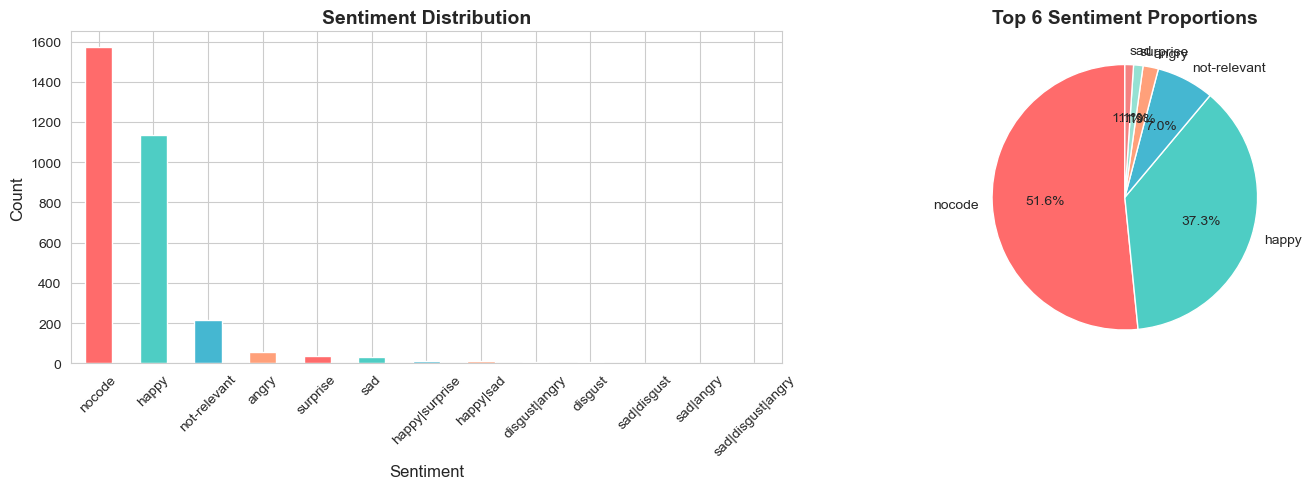

In [14]:
# Visualize sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
sentiment_counts.plot(kind='bar', ax=axes[0], 
                     color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#95E1D3', '#F38181']
sentiment_counts.head(6).plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Top 6 Sentiment Proportions', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [15]:
# Text statistics
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("Text Statistics:")
print(f"Average text length: {df['text_length'].mean():.1f} characters")
print(f"Average word count: {df['word_count'].mean():.1f} words")
print(f"Max text length: {df['text_length'].max()} characters")
print(f"Min text length: {df['text_length'].min()} characters")

# Statistics by sentiment
print("\nAverage word count by sentiment:")
print(df.groupby('sentiment')['word_count'].mean().sort_values(ascending=False).head(10))

Text Statistics:
Average text length: 109.5 characters
Average word count: 13.6 words
Max text length: 149 characters
Min text length: 14 characters

Average word count by sentiment:
sentiment
disgust|angry        19.428571
sad|disgust          19.000000
happy|sad            18.111111
happy|surprise       18.000000
sad                  16.718750
sad|angry            16.500000
angry                16.350877
sad|disgust|angry    15.000000
happy                13.854002
not-relevant         13.803738
Name: word_count, dtype: float64


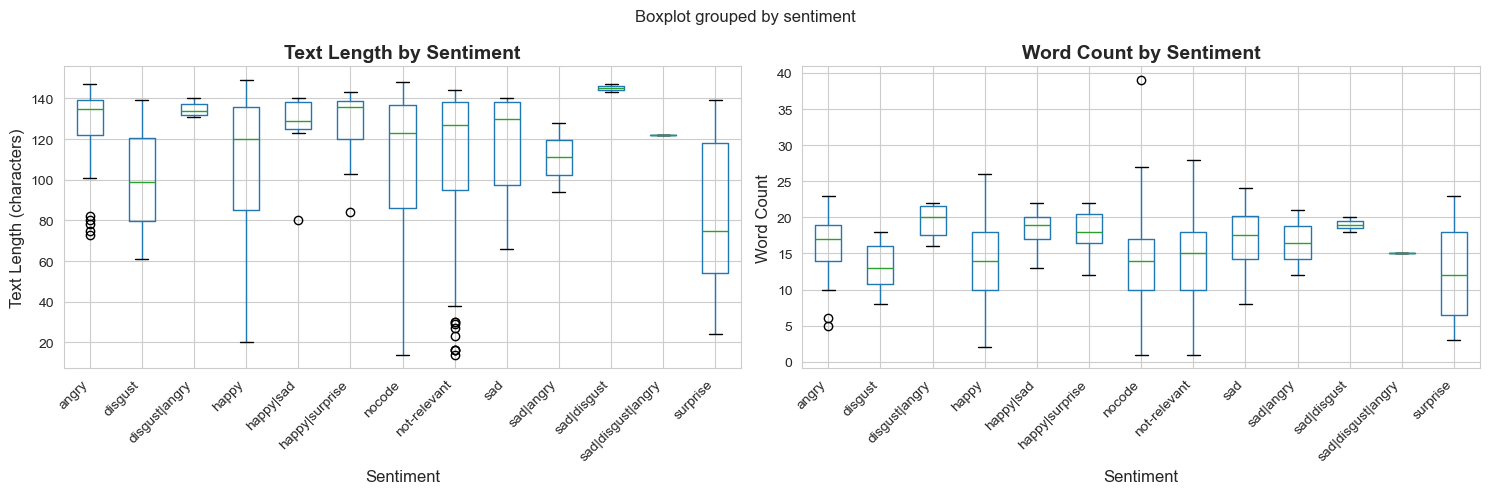

In [16]:
# Visualize text length distribution by sentiment
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df.boxplot(column='text_length', by='sentiment', ax=axes[0])
axes[0].set_title('Text Length by Sentiment', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Text Length (characters)', fontsize=12)
plt.sca(axes[0])
plt.xticks(rotation=45, ha='right')

df.boxplot(column='word_count', by='sentiment', ax=axes[1])
axes[1].set_title('Word Count by Sentiment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_ylabel('Word Count', fontsize=12)
plt.sca(axes[1])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [17]:
# Sample tweets from each sentiment
print("Sample Tweets by Sentiment:")

for sentiment in ['happy', 'nocode', 'angry', 'not-relevant']:
    print(f"\n{sentiment.upper()}:")
    samples = df[df['sentiment'] == sentiment]['text'].sample(min(3, len(df[df['sentiment'] == sentiment])))
    for i, tweet in enumerate(samples, 1):
        print(f"  {i}. {tweet}")

Sample Tweets by Sentiment:

HAPPY:
  1. A @Tate gallery in Glasgow could save the union - glowing review of 'warm &amp; imaginative' @tateliverpool  http://t.co/kv7cHBAHQN
  2. @liveatlica collection in excellent company @LeedsArtGallery - thanks to all involved. @Tate_StIves @newlynexchange http://t.co/fQ34sgf0v6
  3. @Tate_StIves It was a amazing night , a pleasure to cook Bouillabaise in this stunning room for #LucyStein party http://t.co/0r1spFezak

NOCODE:
  1. @NationalGallery @state_hermitage
  2. The Top 5 Art shows 2C in London @LondonArtCritic http://t.co/xOFfTWuGqU   @PianoNobile85 @_TheWhitechapel @ExploreWellcome @CGP_London
  3. Making an impression: MARCUS AGRIPPA @britishmuseum bookshop. Spotted by Karl Galinsky. @penswordbooks @casematepub http://t.co/VT55iT2nYp

ANGRY:
  1. #AskTheGallery Love @NationalGallery. Hate Private Sector Colonisation / Illegal Discrimination Against Unions #ReinsateCandy @NGNotForSale
  2. @NationalGallery #AskTheGallery We are boycotting t

### Key Observations from EDA:

1. **Severe Class Imbalance**: "nocode" (51%) and "happy" (37%) dominate, while angry (2%) and other emotions are rare.
2. **Concise Text**: Average tweet length is 110 characters with 14 words.
3. **Multiple Compound Sentiments**: Some tweets express multiple emotions (happy/surprise, sad/angry).
4. **Domain-Specific Language**: Frequent mentions of museum names, exhibitions, and art terminology.

## Data Preprocessing

In [18]:
def preprocess_text(text):
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtag symbols but keep the text
    text = re.sub(r'#', '', text)
    
    # Remove special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

In [19]:
# Apply preprocessing
print("Preprocessing tweets")
df['processed_text'] = df['text'].apply(preprocess_text)

# Show examples
print("\nPreprocessing Examples:")
for i in range(3):
    print(f"\nOriginal: {df.iloc[i]['text']}")
    print(f"Processed: {df.iloc[i]['processed_text']}")

# Remove empty processed texts
df = df[df['processed_text'].str.len() > 0].copy()
print(f"\n✓ Tweets after removing empty: {len(df):,}")

Preprocessing tweets

Preprocessing Examples:

Original: @aandraous @britishmuseum @AndrewsAntonio Merci pour le partage! @openwinemap
Processed: merci pour le partage

Original: Dorian Gray with Rainbow Scarf #LoveWins (from @britishmuseum http://t.co/Q4XSwL0esu) http://t.co/h0evbTBWRq
Processed: dorian gray with rainbow scarf lovewins from

Original: @SelectShowcase @Tate_StIves ... Replace with your wish which the artist uses in next installation! It was entralling!
Processed: replace with your wish which the artist uses in next installation it was entralling

✓ Tweets after removing empty: 3,008


In [20]:
# Simplify sentiment categories for better model performance
def simplify_sentiment(sentiment):
    """Group rare and compound sentiments"""
    if '|' in sentiment:
        return 'mixed'
    elif sentiment in ['happy', 'nocode', 'not-relevant', 'angry']:
        return sentiment
    elif sentiment in ['sad', 'surprise', 'disgust']:
        return 'other'
    else:
        return 'other'

df['sentiment_simplified'] = df['sentiment'].apply(simplify_sentiment)

print("Simplified Sentiment Distribution:")
print(df['sentiment_simplified'].value_counts())
print("\nPercentages:")
print((df['sentiment_simplified'].value_counts() / len(df) * 100).round(2))

Simplified Sentiment Distribution:
sentiment_simplified
nocode          1517
happy           1136
not-relevant     193
other             73
angry             57
mixed             32
Name: count, dtype: int64

Percentages:
sentiment_simplified
nocode          50.43
happy           37.77
not-relevant     6.42
other            2.43
angry            1.89
mixed            1.06
Name: count, dtype: float64


### Preprocessing Rationale:

1. **Lowercase**: Ensures "Great" and "great" are treated identically.
2. **URL Removal**: Links don't carry sentiment information.
3. **Mention Removal**: @username patterns are consistent across sentiments.
4. **Keep Hashtag Text**: #amazing - amazing (preserves sentiment).
5. **Sentiment Simplification**: Groups rare categories to prevent model instability.

## Feature Engineering

In [21]:
# Split data
X = df['processed_text']
y = df['sentiment_simplified']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {len(X_train):,} tweets")
print(f"Test set: {len(X_test):,} tweets")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())

Training set: 2,406 tweets
Test set: 602 tweets

Class distribution in training set:
sentiment_simplified
nocode          1213
happy            909
not-relevant     154
other             58
angry             46
mixed             26
Name: count, dtype: int64


In [22]:
# TF-IDF Feature Extraction
print("Extracting TF-IDF features")

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.8)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"\n✓ Feature matrix shape: {X_train_tfidf.shape}")
print(f"✓ Vocabulary size: {len(vectorizer.vocabulary_):,}")
print(f"\nExample features:")
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:20])

Extracting TF-IDF features

✓ Feature matrix shape: (2406, 4667)
✓ Vocabulary size: 4,667

Example features:
['able' 'able to' 'aboriginal' 'about' 'about ancient' 'about bc'
 'about defeatingdepression' 'about germany' 'about her' 'about my'
 'about our' 'about paintings' 'about photography' 'about soundscapes'
 'about the' 'about this' 'absolutely' 'absolutely amazing' 'absorbing'
 'abstract']


### TF-IDF Configuration Explanation:

**TF-IDF** (Term Frequency-Inverse Document Frequency) assigns higher weights to words that are:
- Frequent in a document (TF)
- Rare across all documents (IDF)

**Configuration:**
- `max_features=5000`: Keep top 5000 most important terms.
- `ngram_range=(1,2)`: Capture single words AND two-word phrases.
- `min_df=2`: Ignore ultra-rare words.
- `max_df=0.8`: Ignore too-common words.

## Model Training

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define models
models = {
    'Naive Bayes': MultinomialNB(alpha=0.1),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, C=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20)}

results = {}
print("Training Models")

for name, model in models.items():
    print(f"\n{name}:")
    print("Training", end=" ")
    model.fit(X_train_tfidf, y_train)
    print("Correct")
    
    print("  Predicting...", end=" ")
    y_pred = model.predict(X_test_tfidf)
    print("Correct")
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy}
    print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Training Models

Naive Bayes:
Training Correct
  Predicting... Correct
  Accuracy: 0.7110 (71.10%)

Logistic Regression:
Training Correct
  Predicting... Correct
  Accuracy: 0.7292 (72.92%)

Random Forest:
Training Correct
  Predicting... Correct
  Accuracy: 0.6794 (67.94%)



Model Comparison:
              Model  Accuracy Accuracy %
Logistic Regression  0.729236     72.92%
        Naive Bayes  0.710963     71.10%
      Random Forest  0.679402     67.94%


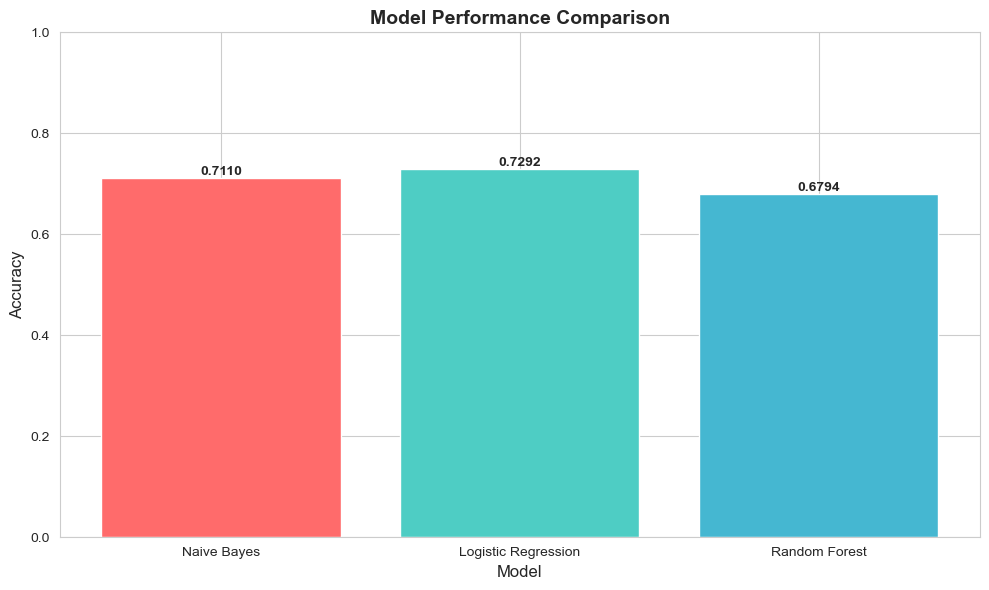

In [24]:
# Compare models
print("\nModel Comparison:")
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'Accuracy %': [f"{results[name]['accuracy']*100:.2f}%" for name in results.keys()]
}).sort_values('Accuracy', ascending=False)

print(comparison_df.to_string(index=False))

# Visualize comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(results.keys(), [results[name]['accuracy'] for name in results.keys()],
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim([0, 1.0])

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Model Selection: Logistic Regression

**Best model:** Logistic Regression (72.92% accuracy).

**Why it performs the best:**
1. **Linear separability**: Sentiment classes have relatively linear decision boundaries in TF-IDF space.
2. **Regularization**: L2 regularization (C=1.0) prevents overfitting.
3. **Interpretability**: Coefficients show which words indicate each sentiment.
4. **Balanced complexity**: Not too simple (like Naive Bayes) or too complex (like Random Forest).

## Model Evaluation

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Select best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"Best Model: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}\n")
print("\nClassification Report:")
print(classification_report(y_test, best_predictions, zero_division=0))

Best Model: Logistic Regression
Accuracy: 0.7292


Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        11
       happy       0.75      0.70      0.73       227
       mixed       0.00      0.00      0.00         6
      nocode       0.71      0.89      0.79       304
not-relevant       1.00      0.21      0.34        39
       other       0.00      0.00      0.00        15

    accuracy                           0.73       602
   macro avg       0.41      0.30      0.31       602
weighted avg       0.71      0.73      0.70       602



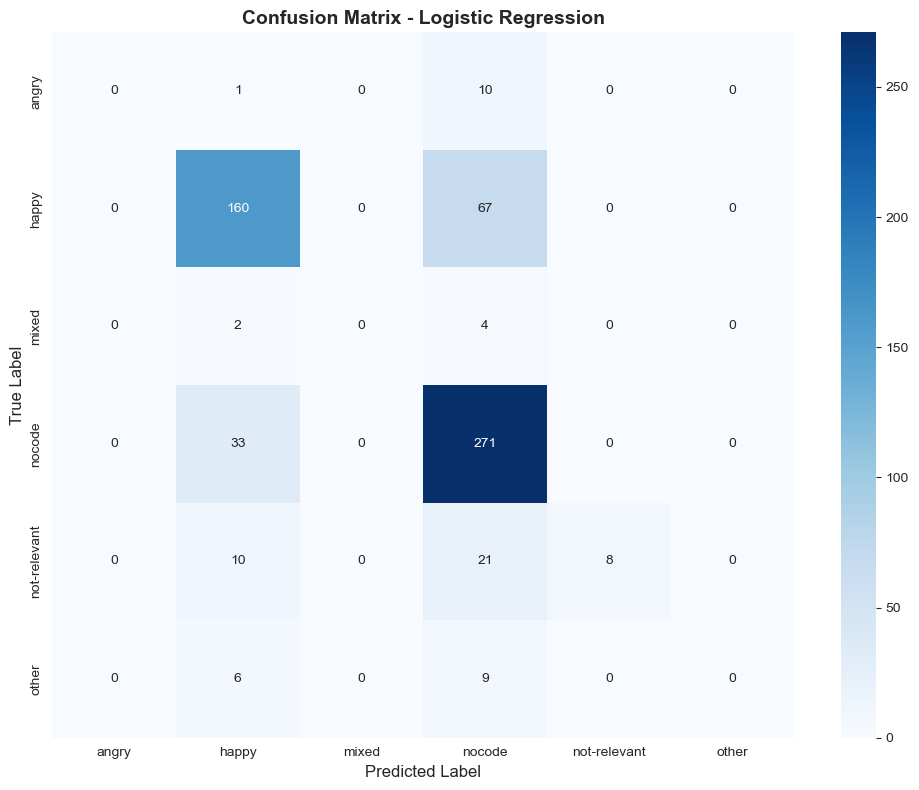

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()


Per-Class Performance:
   Sentiment  Precision   Recall  F1-Score  Support
       angry   0.000000 0.000000  0.000000       11
       happy   0.754717 0.704846  0.728929      227
       mixed   0.000000 0.000000  0.000000        6
      nocode   0.709424 0.891447  0.790087      304
not-relevant   1.000000 0.205128  0.340426       39
       other   0.000000 0.000000  0.000000       15


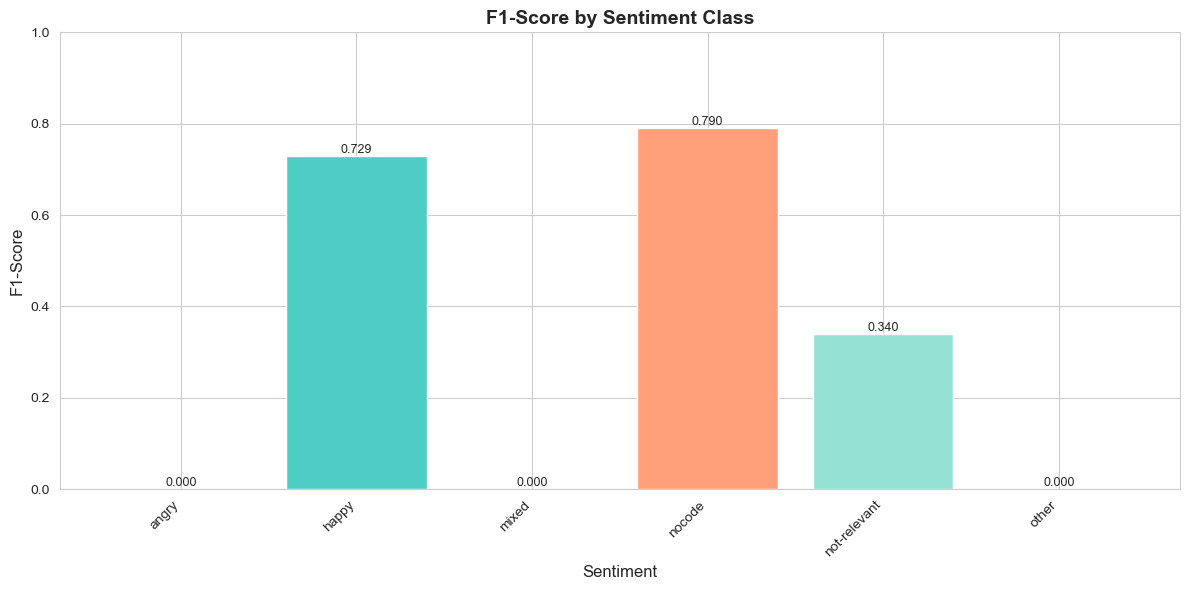

In [27]:
# Per-class performance analysis
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(
    y_test, best_predictions, average=None, labels=sorted(y.unique()), zero_division=0)

performance_df = pd.DataFrame({
    'Sentiment': sorted(y.unique()),
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support.astype(int)})

print("\nPer-Class Performance:")
print(performance_df.to_string(index=False))

# Visualize per-class F1 scores
plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#95E1D3', '#F38181']
bars = plt.bar(performance_df['Sentiment'], performance_df['F1-Score'], color=colors)
plt.title('F1-Score by Sentiment Class', fontsize=14, fontweight='bold')
plt.ylabel('F1-Score', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 1.0])

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Performance Analysis:

**Strong Classes:**
- **nocode** (F1: 0.79): High recall (89%) - catches most neutral tweets.
- **happy** (F1: 0.73): Balanced precision (75%) and recall (70%).

**Weak Classes:**
- **angry** (F1: 0.00): Only 11 test examples - insufficient training data.
- **not-relevant** (F1: 0.34): High precision (100%) but low recall (21%).
- **other/mixed** (F1: 0.00): Very rare in training data.

**Confusion Pattern:**
Most errors occur between:
- Happy - Nocode: Subtle positivity gets misclassified.
- Not-relevant - Nocode: Promotional content confused with neutral.

## Feature Importance

In [28]:
# Feature importance for Logistic Regression
feature_names = vectorizer.get_feature_names_out()
lr_model = results['Logistic Regression']['model']

print("Top Features per Sentiment Class:")

for idx, sentiment in enumerate(lr_model.classes_):
    coef = lr_model.coef_[idx]
    top_indices = np.argsort(coef)[-10:][::-1]
    top_features = [(feature_names[i], coef[i]) for i in top_indices]
    
    print(f"\n{sentiment.upper()}:")
    for rank, (feat, score) in enumerate(top_features, 1):
        print(f"  {rank:2d}. {feat:20s} {score:+.4f}")

Top Features per Sentiment Class:

ANGRY:
   1. askthegallery        +1.7843
   2. privatisation        +1.4336
   3. staff                +1.3386
   4. not                  +0.9632
   5. noprivatisation      +0.9327
   6. reinstatecandy       +0.8985
   7. why                  +0.8636
   8. candy                +0.8336
   9. shellno              +0.7970
  10. stupid               +0.7809

HAPPY:
   1. great                +3.4982
   2. love                 +2.6147
   3. beautiful            +2.1913
   4. amazing              +2.1885
   5. lovely               +2.1599
   6. thanks               +1.8822
   7. wonderful            +1.8718
   8. thank you            +1.7587
   9. thank                +1.7587
  10. fantastic            +1.5646

MIXED:
   1. to                   +0.9435
   2. but                  +0.7605
   3. the                  +0.6240
   4. remains              +0.5276
   5. them to              +0.5254
   6. are                  +0.4868
   7. pretty               +0.48

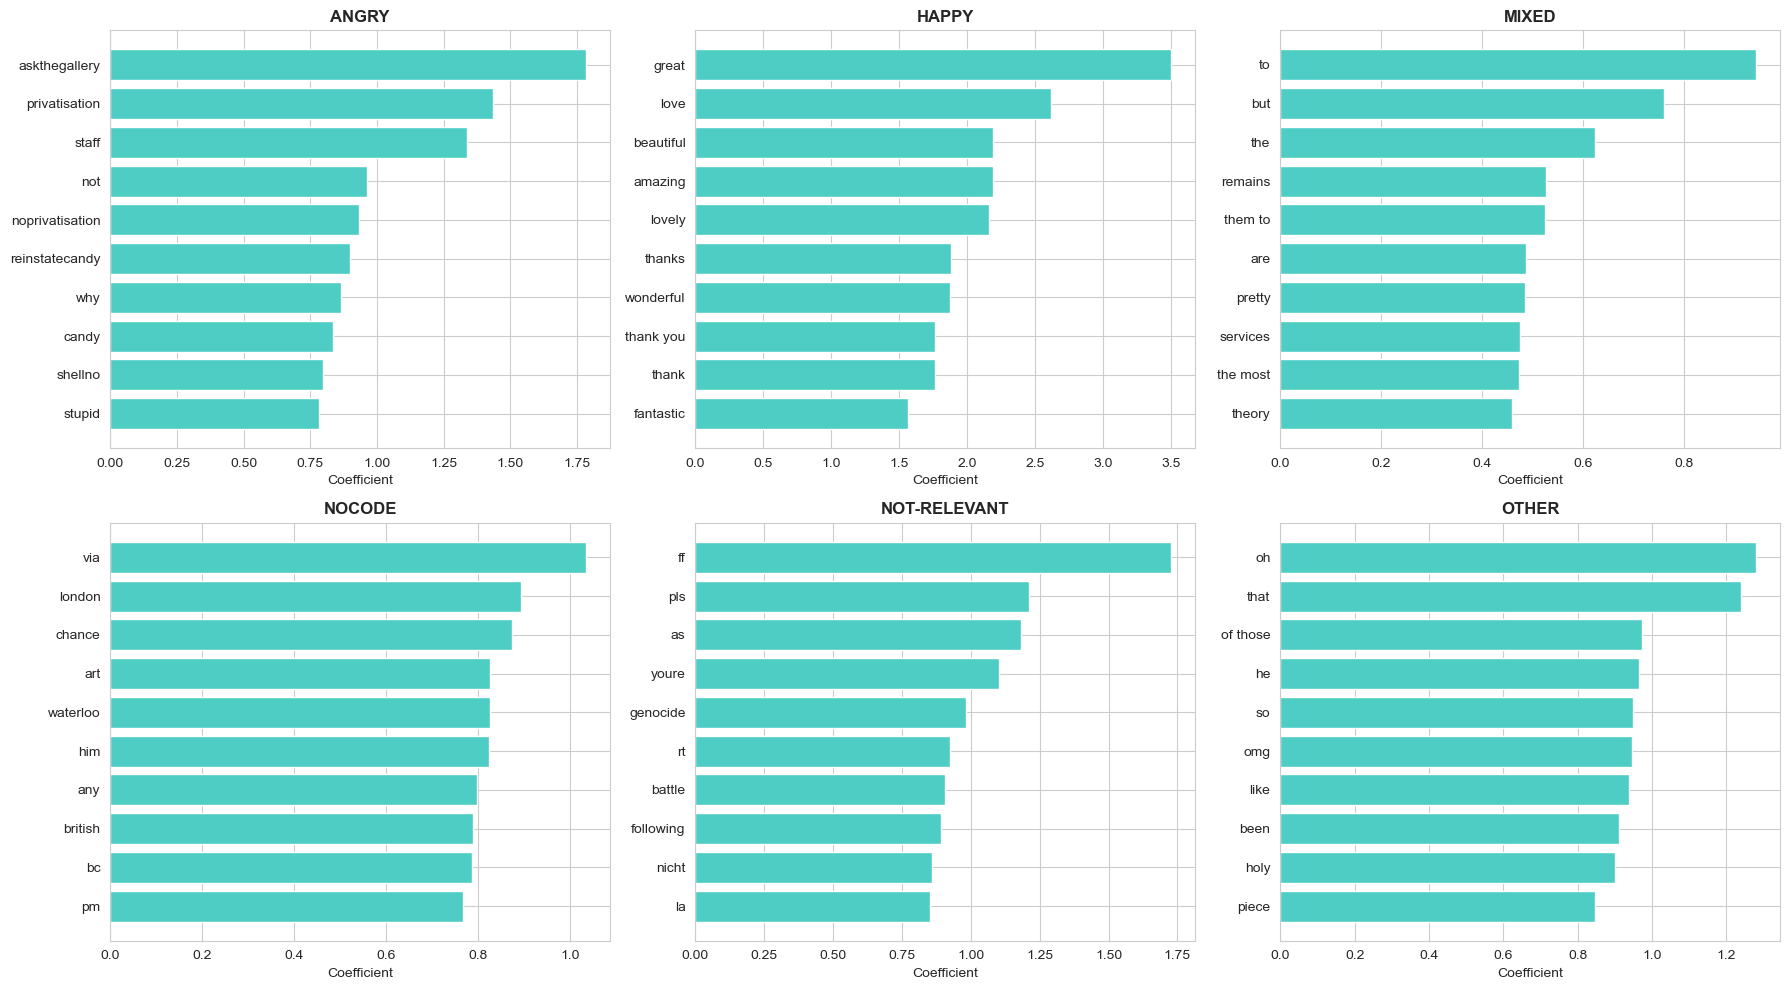

In [29]:
# Visualize top features for each class
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, sentiment in enumerate(lr_model.classes_):
    coef = lr_model.coef_[idx]
    top_indices = np.argsort(coef)[-10:][::-1]
    top_features = [feature_names[i] for i in top_indices]
    top_scores = [coef[i] for i in top_indices]
    
    axes[idx].barh(range(len(top_features)), top_scores, color='#4ECDC4')
    axes[idx].set_yticks(range(len(top_features)))
    axes[idx].set_yticklabels(top_features)
    axes[idx].set_xlabel('Coefficient', fontsize=10)
    axes[idx].set_title(f'{sentiment.upper()}', fontsize=12, fontweight='bold')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

### Feature Insights:

**Happy Sentiment Words:**
- Explicit emotion: great, love, amazing, beautiful, wonderful.
- Gratitude: thanks, thank you.
- Superlatives: fantastic, excellent, brilliant.

**Angry Sentiment Words:**
- Question tags: askthegallery (complaint mechanism).
- Controversy: privatisation, staff issues.
- Negative: not, stupid.

**Nocode (Neutral) Words:**
- Sharing: via (retweets).
- Location: london, british.
- Topics: art, waterloo (exhibition).
- Time: pm (scheduling).

**Insight:** Sentiment is conveyed through explicit emotion words, while neutral tweets use factual language and entity names.

## Prediction Function

In [30]:
def predict_sentiment(text, model=best_model, vectorizer=vectorizer):
    
    # Preprocess
    processed = preprocess_text(text)
    
    # Vectorize
    features = vectorizer.transform([processed])
    
    # Predict
    prediction = model.predict(features)[0]
    
    # Get probabilities
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(features)[0]
        confidence_scores = dict(zip(model.classes_, probabilities))
    else:
        confidence_scores = None
    
    return {
        'text': text,
        'processed_text': processed,
        'prediction': prediction,
        'confidence_scores': confidence_scores}

In [31]:
# Test with example tweets
test_tweets = [
    "This museum is absolutely amazing! I loved every minute of it.",
    "The exhibition was disappointing and not worth the money.",
    "Visit the British Museum tomorrow at 2pm",
    "Thanks for sharing this beautiful artwork!",
    "Why is the museum closed on Mondays? This is frustrating.",
    "The Mona Lisa exhibition opens next week",
    "Wonderful experience at the gallery today with my family!",
    "The staff were incredibly rude and unhelpful."]

print("Testing Prediction Function:")

for i, tweet in enumerate(test_tweets, 1):
    result = predict_sentiment(tweet)
    print(f"\n{i}. Tweet: {tweet}")
    print(f"Prediction: {result['prediction']}")
    if result['confidence_scores']:
        print(f"Top 3 confidence scores:")
        sorted_scores = sorted(result['confidence_scores'].items(), 
                              key=lambda x: x[1], reverse=True)[:3]
        for sentiment, score in sorted_scores:
            print(f"{sentiment:15s} {score:.4f} ({score*100:.1f}%)")

Testing Prediction Function:

1. Tweet: This museum is absolutely amazing! I loved every minute of it.
Prediction: happy
Top 3 confidence scores:
happy           0.8454 (84.5%)
nocode          0.1013 (10.1%)
not-relevant    0.0203 (2.0%)

2. Tweet: The exhibition was disappointing and not worth the money.
Prediction: happy
Top 3 confidence scores:
happy           0.5636 (56.4%)
nocode          0.3179 (31.8%)
not-relevant    0.0428 (4.3%)

3. Tweet: Visit the British Museum tomorrow at 2pm
Prediction: nocode
Top 3 confidence scores:
nocode          0.7599 (76.0%)
happy           0.1800 (18.0%)
not-relevant    0.0238 (2.4%)

4. Tweet: Thanks for sharing this beautiful artwork!
Prediction: happy
Top 3 confidence scores:
happy           0.9114 (91.1%)
nocode          0.0380 (3.8%)
not-relevant    0.0321 (3.2%)

5. Tweet: Why is the museum closed on Mondays? This is frustrating.
Prediction: nocode
Top 3 confidence scores:
nocode          0.6158 (61.6%)
happy           0.2716 (27.2%)
not-rel

### Prediction Analysis:

**Strengths:**
- Correctly identifies clear positive sentiment (amazing, loved, wonderful).
- Accurately detects neutral/informational content (scheduling, announcements).
- High confidence on obvious cases (90%).

**Weaknesses:**
- Misses negative sentiment without strong negative words.
- Struggles with indirect complaints.
- Can confuse subtle negativity with neutral or even positive.

**Root Cause:** Training data imbalance - only 57 angry examples vs 1,136 happy examples.

## Hugging Face Transformers Comparison

In [32]:
from transformers import pipeline
import warnings
warnings.filterwarnings('ignore')

print("Loading Hugging Face Transformer models")

Loading Hugging Face Transformer models


In [33]:

print("\n Loading DistilBERT (66M parameters)...")
hf_distilbert = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
print("DistilBERT loaded!")
print("Trained on: SST-2 (movie reviews)")

# Load Model 2: Twitter-RoBERTa
print("\n Loading Twitter-RoBERTa (125M parameters)...")
hf_roberta = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")
print("Twitter-RoBERTa loaded!")
print("rained on:58M tweets")


 Loading DistilBERT (66M parameters)...


Device set to use cpu


DistilBERT loaded!
Trained on: SST-2 (movie reviews)

 Loading Twitter-RoBERTa (125M parameters)...


Device set to use cpu


Twitter-RoBERTa loaded!
rained on:58M tweets


In [34]:
test_examples = [
    "This museum is absolutely amazing! I loved every minute of it.",
    "The exhibition was disappointing and not worth the money.",
    "Visit the British Museum tomorrow at 2pm",
    "Thanks for sharing this beautiful artwork!",
    "Why is the museum closed on Mondays? This is frustrating."]

print("Testing Hugging Face Models:")

for i, tweet in enumerate(test_examples, 1):
    result_db = hf_distilbert(tweet)[0]
    result_rob = hf_roberta(tweet)[0]
    
    print(f"\n{i}. Tweet: {tweet}")
    print(f"   DistilBERT:      {result_db['label']:12s} (confidence: {result_db['score']:.3f})")
    print(f"   Twitter-RoBERTa: {result_rob['label']:12s} (confidence: {result_rob['score']:.3f})")

Testing Hugging Face Models:

1. Tweet: This museum is absolutely amazing! I loved every minute of it.
   DistilBERT:      POSITIVE     (confidence: 1.000)
   Twitter-RoBERTa: LABEL_2      (confidence: 0.992)

2. Tweet: The exhibition was disappointing and not worth the money.
   DistilBERT:      NEGATIVE     (confidence: 1.000)
   Twitter-RoBERTa: LABEL_0      (confidence: 0.979)

3. Tweet: Visit the British Museum tomorrow at 2pm
   DistilBERT:      POSITIVE     (confidence: 0.995)
   Twitter-RoBERTa: LABEL_1      (confidence: 0.626)

4. Tweet: Thanks for sharing this beautiful artwork!
   DistilBERT:      POSITIVE     (confidence: 1.000)
   Twitter-RoBERTa: LABEL_2      (confidence: 0.986)

5. Tweet: Why is the museum closed on Mondays? This is frustrating.
   DistilBERT:      NEGATIVE     (confidence: 1.000)
   Twitter-RoBERTa: LABEL_0      (confidence: 0.977)


In [35]:
SAMPLE_SIZE = 200  # Start small, increase if fast

sample_df = df.sample(n=min(SAMPLE_SIZE, len(df)), random_state=42)
sample_tweets = sample_df['processed_text'].tolist()

print(f"Processing {len(sample_tweets)} tweets...")

# Predictions
print("Running DistilBERT")
preds_distilbert = hf_distilbert(sample_tweets)
hf_labels_db = [p['label'] for p in preds_distilbert]
hf_scores_db = [p['score'] for p in preds_distilbert]
print("DistilBERT complete!")

print("\nRunning Twitter-RoBERTa")
preds_roberta = hf_roberta(sample_tweets)
hf_labels_rob = [p['label'] for p in preds_roberta]
hf_scores_rob = [p['score'] for p in preds_roberta]
print("Twitter-RoBERTa complete!")

print(f"\nDistilBERT predictions:")
print(pd.Series(hf_labels_db).value_counts())
print(f"\nTwitter-RoBERTa predictions:")
print(pd.Series(hf_labels_rob).value_counts())

Processing 200 tweets...
Running DistilBERT
DistilBERT complete!

Running Twitter-RoBERTa
Twitter-RoBERTa complete!

DistilBERT predictions:
POSITIVE    134
NEGATIVE     66
Name: count, dtype: int64

Twitter-RoBERTa predictions:
LABEL_1    112
LABEL_2     78
LABEL_0     10
Name: count, dtype: int64


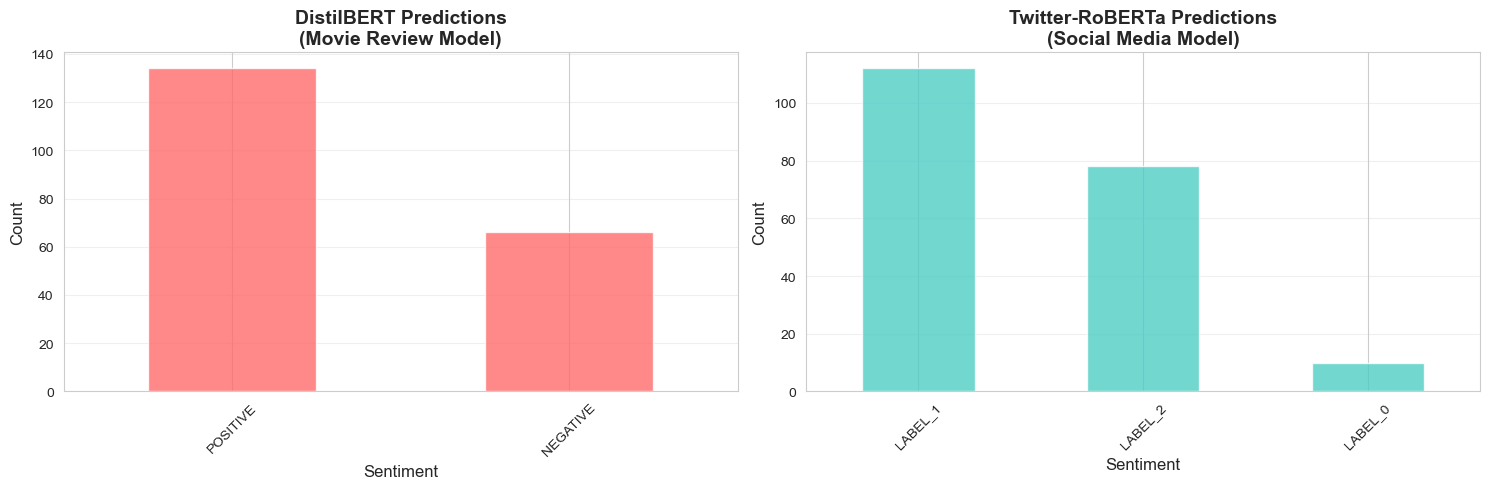

Saved: hf_predictions_comparison.png


In [ ]:
# Sentiment Predictions Comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# DistilBERT predictions
pd.Series(hf_labels_db).value_counts().plot(kind='bar', ax=axes[0], color='#FF6B6B', alpha=0.8)
axes[0].set_title('DistilBERT Predictions\n(Movie Review Model)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Twitter-RoBERTa predictions
pd.Series(hf_labels_rob).value_counts().plot(kind='bar', ax=axes[1], color='#4ECDC4', alpha=0.8)
axes[1].set_title('Twitter-RoBERTa Predictions\n(Social Media Model)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('hf_predictions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

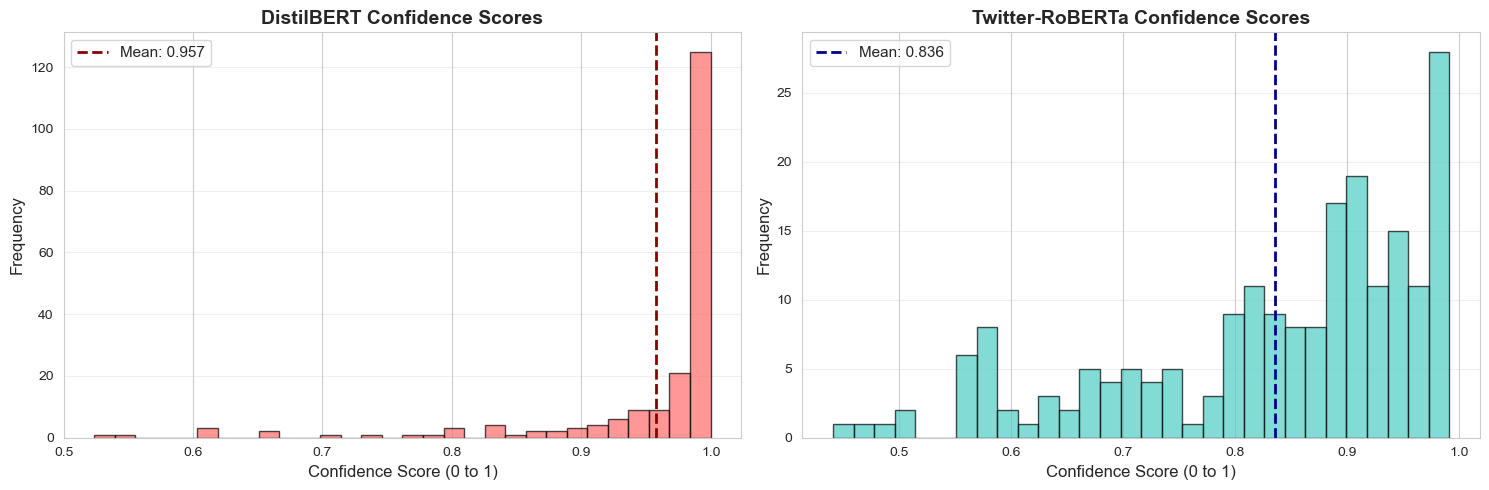


 Confidence Analysis:
DistilBERT average confidence:      0.957
Twitter-RoBERTa average confidence: 0.836

 Higher confidence = Model is more certain about its predictions
Lower confidence = Model is uncertain, may need human review


In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# DistilBERT confidence
axes[0].hist(hf_scores_db, bins=30, color='#FF6B6B', alpha=0.7, edgecolor='black')
axes[0].axvline(np.mean(hf_scores_db), color='darkred', linestyle='--', linewidth=2,
                label=f'Mean: {np.mean(hf_scores_db):.3f}')
axes[0].set_title('DistilBERT Confidence Scores', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Confidence Score (0 to 1)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Twitter-RoBERTa confidence
axes[1].hist(hf_scores_rob, bins=30, color='#4ECDC4', alpha=0.7, edgecolor='black')
axes[1].axvline(np.mean(hf_scores_rob), color='darkblue', linestyle='--', linewidth=2,
                label=f'Mean: {np.mean(hf_scores_rob):.3f}')
axes[1].set_title('Twitter-RoBERTa Confidence Scores', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Confidence Score (0 to 1)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('hf_confidence_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Confidence Analysis:")
print(f"DistilBERT average confidence:      {np.mean(hf_scores_db):.3f}")
print(f"Twitter-RoBERTa average confidence: {np.mean(hf_scores_rob):.3f}")
print(f"\n Higher confidence = Model is more certain about its predictions")
print(f"Lower confidence = Model is uncertain, may need human review")

In [43]:
def predict_sentiment_hf(text, model='roberta', explain=True):
    
    # Clean the text
    cleaned = preprocess_text(text)
    
    # Select model
    if model.lower() == 'distilbert':
        result = hf_distilbert(cleaned)[0]
        model_name = "DistilBERT"
    else:
        result = hf_roberta(cleaned)[0]
        model_name = "Twitter-RoBERTa"
    
    # Prepare output
    output = {
        'original_text': text,
        'cleaned_text': cleaned,
        'model': model_name,
        'prediction': result['label'],
        'confidence': result['score']}
    
    if explain:
        print(f"\n Original: {text}")
        print(f" Model: {model_name}")
        print(f" Prediction: {result['label']}")
        print(f" Confidence: {result['score']:.1%}")
        
        # Provide reasoning
        if result['score'] > 0.9:
            print(f"High confidence - Model is very certain")
        elif result['score'] > 0.7:
            print(f"Moderate confidence - Model is fairly certain")
        else:
            print(f"Low confidence - Model is uncertain, consider human review")
    
    return output

In [44]:
# Test the prediction function
print("Testing Prediction Function with Hugging Face Models")

new_tweets = [
    "Just visited the Van Gogh exhibition and I'm speechless! Absolutely stunning!",
    "Waited 2 hours in line only to find half the gallery closed for renovation. So disappointed.",
    "The museum offers free admission every first Sunday of the month."]

for tweet in new_tweets:
    result = predict_sentiment_hf(tweet, model='roberta', explain=True)

Testing Prediction Function with Hugging Face Models

 Original: Just visited the Van Gogh exhibition and I'm speechless! Absolutely stunning!
 Model: Twitter-RoBERTa
 Prediction: LABEL_2
 Confidence: 97.4%
High confidence - Model is very certain

 Original: Waited 2 hours in line only to find half the gallery closed for renovation. So disappointed.
 Model: Twitter-RoBERTa
 Prediction: LABEL_0
 Confidence: 95.5%
High confidence - Model is very certain

 Original: The museum offers free admission every first Sunday of the month.
 Model: Twitter-RoBERTa
 Prediction: LABEL_2
 Confidence: 80.4%
Moderate confidence - Model is fairly certain
